In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import io
%matplotlib inline
from skimage.io import imread, imshow

In [2]:

# img = cv2.imread("../input/augmented-skinCancer_isic/skin-cancer ISIC The International Skin Imaging Collaboration/Test/nevus/ISIC_0000010.jpg",0)
# gauss_img= cv2.GaussianBlur(img,(3,3),0,borderType = cv2.BORDER_CONSTANT)
# median_img= cv2.medianBlur(img,3)
# _, axs = plt.subplots(1,3, figsize= (15, 10))
# axs[0].imshow(img,cmap="gray")
# axs[1].imshow(gauss_img,cmap="gray")
# axs[2].imshow(median_img,cmap="gray")


# 1. Image Acquisition

##  1.1. Creating Dataset

In [3]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    orig_img=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            img = io.imread(image_path)
            image_gray= cv2.imread( image_path, 0)
            image_resize=cv2.resize(image_gray, (200,200),interpolation = cv2.INTER_AREA)
            image=np.array(image_resize)
            image = image.astype('float32')
            image /= 255 
            orig_img.append(img)
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name ,orig_img
# extract the image array and class name
test_img_data, test_class_name,test_orig=create_dataset(r'../input/dataskin/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration 2/Test')
train_img_data, train_class_name,train_orig =create_dataset(r'../input/dataskin/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration 2/Train')

In [4]:
len(train_orig)

2310

In [5]:
# trainAug = Sequential([
#     preprocessing.RandomFlip("horizontal_and_vertical"),
#     preprocessing.RandomZoom(
#         height_factor=(-0.05, -0.15),
#         width_factor=(-0.05, -0.15)),
#     preprocessing.RandomRotation(0.3)
# ])
# trainDS = tf.data.Dataset.from_tensor_slices((test_img_data, test_class_name))
# trainDS = (
#     trainDS
#     .shuffle(BATCH_SIZE * 100)
#     .batch(BATCH_SIZE)
#     .map(lambda x, y: (trainAug(x), y),
#          num_parallel_calls=tf.data.AUTOTUNE)
#     .prefetch(tf.data.AUTOTUNE)
# )


## 1.2. Original Images

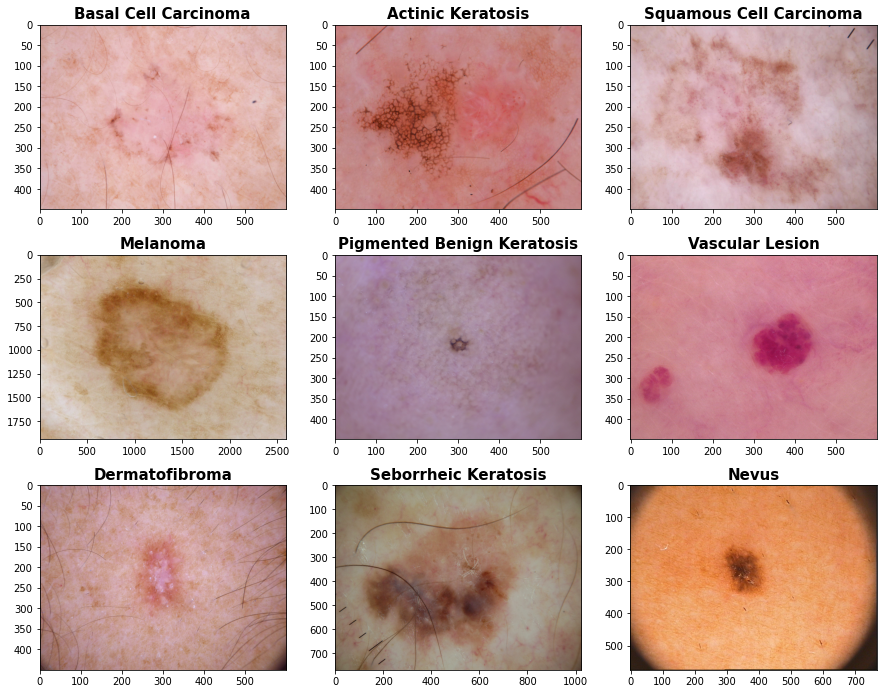

In [6]:
def plot_images(data,type):
    _, axs = plt.subplots(3,3, figsize= (15, 12))
    axs = axs.flatten()
    if type=="gray":
        axs[0].imshow(data[225],cmap="gray")
        axs[0].set_title("Basal Cell Carcinoma", fontsize=15, fontweight='bold')
        axs[1].imshow(data[450],cmap="gray")
        axs[1].set_title("Actinic Keratosis", fontsize=15, fontweight='bold')
        axs[2].imshow(data[670],cmap="gray")
        axs[2].set_title("Squamous Cell Carcinoma", fontsize=15, fontweight='bold')
        axs[3].imshow(data[755],cmap="gray")
        axs[3].set_title("Melanoma", fontsize=15, fontweight='bold')
        axs[4].imshow(data[1200],cmap="gray")
        axs[4].set_title("Pigmented Benign Keratosis", fontsize=15, fontweight='bold')
        axs[5].imshow(data[1650],cmap="gray")
        axs[5].set_title("Vascular Lesion", fontsize=15, fontweight='bold')
        axs[6].imshow(data[1800],cmap="gray")
        axs[6].set_title("Dermatofibroma", fontsize=15, fontweight='bold')
        axs[7].imshow(data[1900],cmap="gray")
        axs[7].set_title("Seborrheic Keratosis", fontsize=15, fontweight='bold')
        axs[8].imshow(data[2000],cmap="gray")
        axs[8].set_title("Nevus", fontsize=15, fontweight='bold')
    elif type=="non-gray":
        axs[0].imshow(data[225])
        axs[0].set_title("Basal Cell Carcinoma", fontsize=15, fontweight='bold')
        axs[1].imshow(data[450])
        axs[1].set_title("Actinic Keratosis", fontsize=15, fontweight='bold')
        axs[2].imshow(data[670])
        axs[2].set_title("Squamous Cell Carcinoma", fontsize=15, fontweight='bold')
        axs[3].imshow(data[755])
        axs[3].set_title("Melanoma", fontsize=15, fontweight='bold')
        axs[4].imshow(data[1200])
        axs[4].set_title("Pigmented Benign Keratosis", fontsize=15, fontweight='bold')
        axs[5].imshow(data[1650])
        axs[5].set_title("Vascular Lesion", fontsize=15, fontweight='bold')
        axs[6].imshow(data[1800])
        axs[6].set_title("Dermatofibroma", fontsize=15, fontweight='bold')
        axs[7].imshow(data[1900])
        axs[7].set_title("Seborrheic Keratosis", fontsize=15, fontweight='bold')
        axs[8].imshow(data[2000])
        axs[8].set_title("Nevus", fontsize=15, fontweight='bold')
    plt.show()
plot_images(train_orig,"non-gray")

In [7]:
# y_train[2000]

## 1.3. Gray Scale Conversion

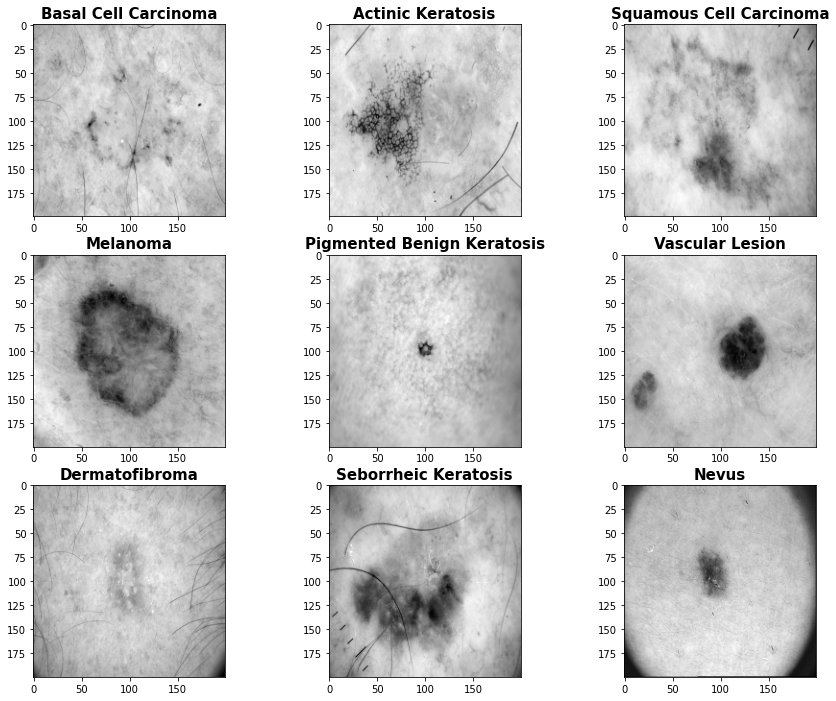

In [8]:
plot_images(train_img_data,"gray")

# 2. Image Preprocessing

## 2.1. Image Denoising

## 2.1.1. Gaussian Filtered Images

In [9]:
# def gaussian_filter(img):
#     gauss_array = []
#     for i in img:
#         gauss_img = cv2.GaussianBlur(i,(3,3),0,borderType = cv2.BORDER_CONSTANT)
#         gauss_array.append(gauss_img)
#     return gauss_array
# train_gauss_img = gaussian_filter(train_img_data)
# test_gauss_img = gaussian_filter(test_img_data)
# plot_images(train_gauss_img,"gray")

## 2.1.2. Median Filtered Images

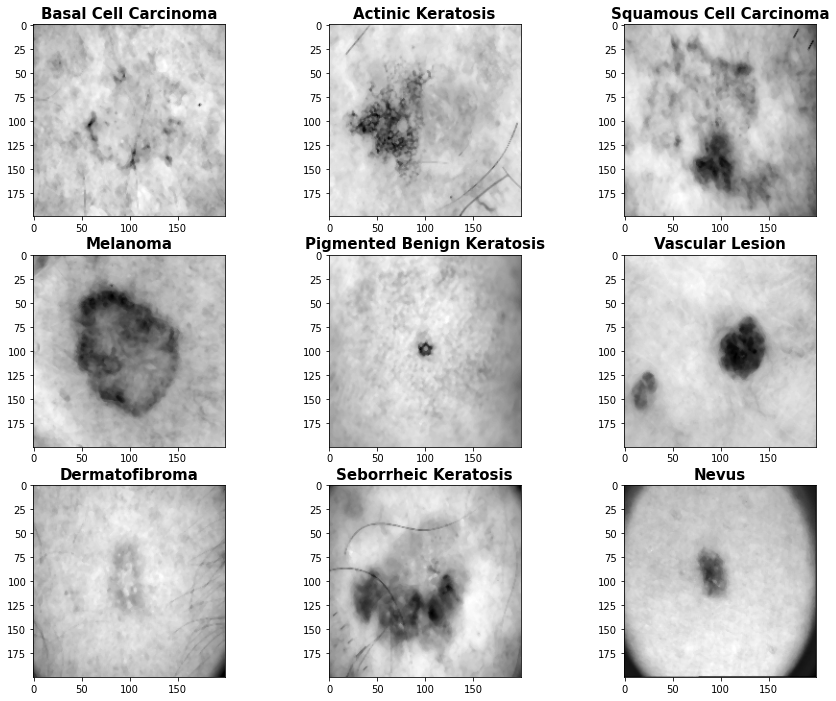

In [10]:
def median_filter(img):
    median_array = []
    for i in img:
        median_img= cv2.medianBlur(i,3)
        median_array.append(median_img)
    return median_array
train_median_img = median_filter(train_img_data)
test_median_img = median_filter(test_img_data)
del train_img_data
del test_img_data
plot_images(train_median_img,"gray")

## 2.2. Hair/Bubble Removal

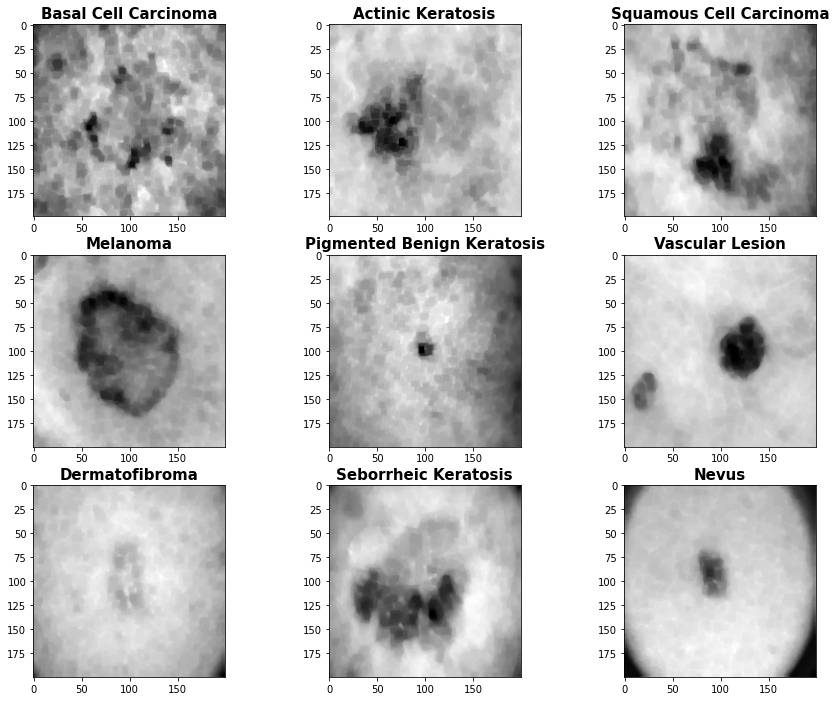

In [11]:
def hair_removal(img):
    hair_removal=[]
    for i in img:
        kernel = np.ones((3,3),np.uint8)
        # Perform closing to remove hair and blur the image
        closing = cv2.morphologyEx(i,cv2.MORPH_CLOSE,kernel, iterations = 2)
        hair_removal.append(closing)
    return hair_removal
train_hair_removal= hair_removal(train_median_img)
test_hair_removal= hair_removal(test_median_img)
del train_median_img
del test_median_img
plot_images(train_hair_removal,"gray")

## 2.3. Contrast Enhancement - Adaptive Histogram equalization

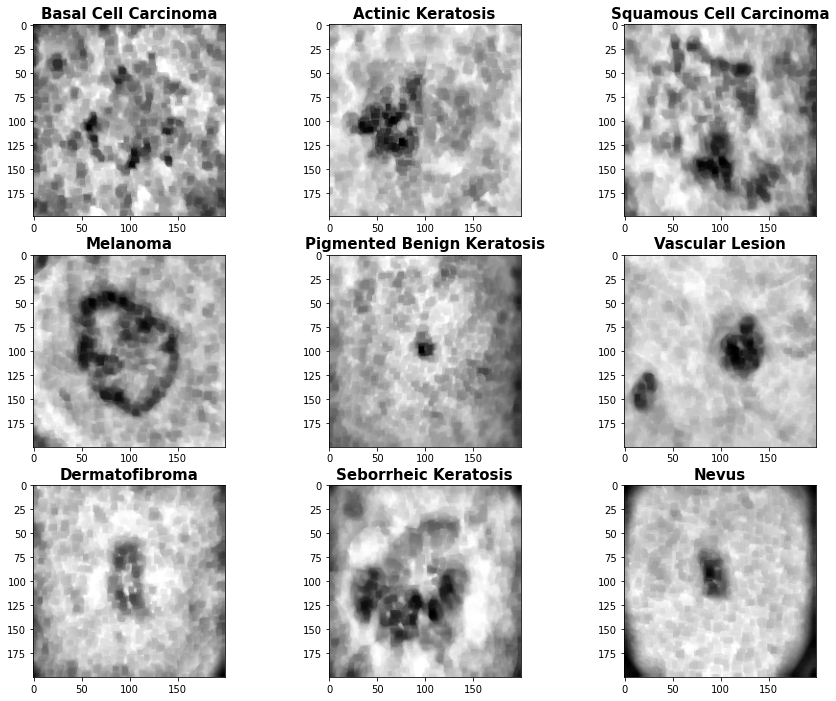

In [12]:
from skimage import exposure
def histogram_equalization(img):
    hist_img=[]
    for i in img:
        equ = exposure.equalize_adapthist(i, clip_limit=0.02)
        #equ = exposure.equalize_hist(i)
        #equ = cv2.equalizeHist(im)
        hist_img.append(equ)
    return hist_img
train_hist_equal = histogram_equalization(train_hair_removal)
test_hist_equal = histogram_equalization(test_hair_removal)
del train_hair_removal
del test_hair_removal
plot_images(train_hist_equal,"gray")

# 3. Image Segmentation

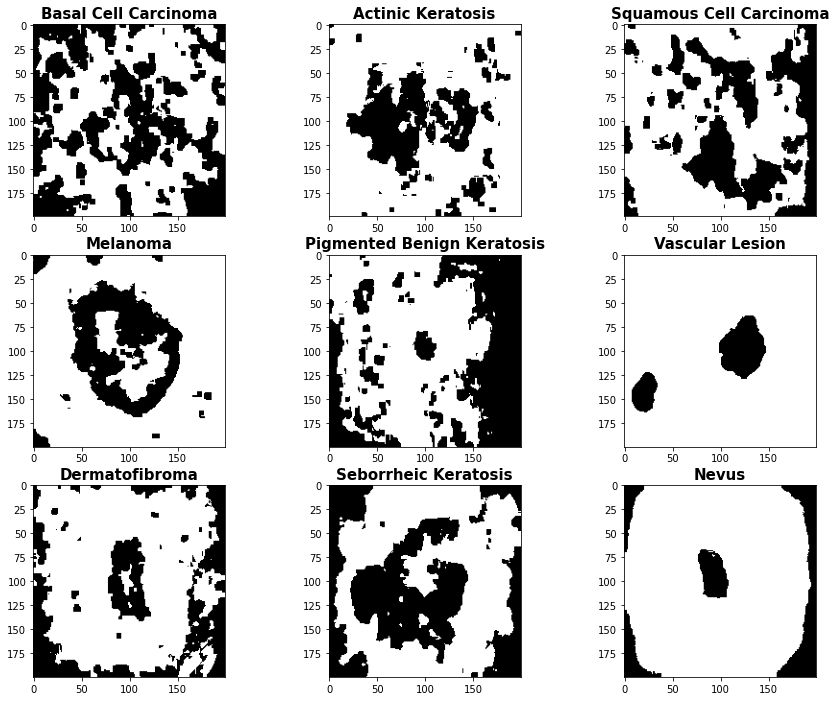

In [13]:
from skimage import filters
def image_segmentation(img):
    img_segment=[]
    for i in img:
        threshold = filters.threshold_otsu(i)
        binarized_coffee = (i > threshold)*1
        img_segment.append(binarized_coffee)
    return img_segment

train_img_segment = image_segmentation(train_hist_equal)
test_img_segment = image_segmentation(test_hist_equal)
del train_hist_equal
del test_hist_equal
plot_images(train_img_segment,"gray")    

# 4. Feature Extraction

## 4.1. Label Encoding of target class

In [14]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels
y_train= label_encoder.fit_transform(train_class_name)
y_test= label_encoder.fit_transform(test_class_name)
x_train = np.array(train_img_segment).reshape(-1,200,200,1)
x_test = np.array(test_img_segment).reshape(-1,200,200,1)
del train_img_segment
del test_img_segment
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
del train_orig
del test_orig

In [15]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(
# ...     x_train, y_train, test_size=0.3, random_state=42)

In [16]:

import tensorflow as tf
import keras
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras import layers
from keras.layers import Input, GlobalAveragePooling2D, Add, Dense, Activation, ZeroPadding2D, BatchNormalization,add, Flatten, Conv2D, AveragePooling2D,MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from keras.layers.merge import concatenate
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# data_augmentation = tf.keras.Sequential(
#   [
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.7),
#   ]
# )
# model = Sequential([
#   data_augmentation,
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(9)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# Building cnn_layers_model with 4 layers
cnn_layers_model=Sequential()
# cnn_layers_model.add(data_augmentation)
# 1 Convolutional layer
cnn_layers_model.add(Conv2D(filters=32,kernel_size=3,activation='relu',
                            padding='same',input_shape=(200,200,1)))
cnn_layers_model.add(MaxPooling2D(pool_size=2))
cnn_layers_model.add(Dropout(0.4))
# 2 Convolutional + Pooling layer
cnn_layers_model.add(Conv2D(filters=64,kernel_size=5,padding='same',activation='relu'))
cnn_layers_model.add(MaxPooling2D(pool_size=2))
cnn_layers_model.add(Dropout(0.4))
# # 3 Convolutional + Pooling layer
cnn_layers_model.add(Conv2D(filters=128,kernel_size=5,activation='relu'))
cnn_layers_model.add(MaxPooling2D(pool_size=2))
cnn_layers_model.add(Dropout(0.4))
# # 3 Convolutional + Pooling layer
cnn_layers_model.add(Conv2D(filters=256,kernel_size=7,activation='relu'))
cnn_layers_model.add(MaxPooling2D(pool_size=2))
cnn_layers_model.add(Dropout(0.4))


# Flatten layer
cnn_layers_model.add(Flatten())
 # Dense Layers
cnn_layers_model.add(Dense(300,activation='relu'))
cnn_layers_model.add(Dropout(0.4)) 
cnn_layers_model.add(Dense(200,activation='relu'))
cnn_layers_model.add(Dropout(0.4))
cnn_layers_model.add(Dense(9,activation='softmax'))
# Compiling the model
cnn_layers_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Summarizing the model
cnn_layers_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       2

2022-04-11 02:47:59.056780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 02:47:59.148976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 02:47:59.149809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 02:47:59.151010: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

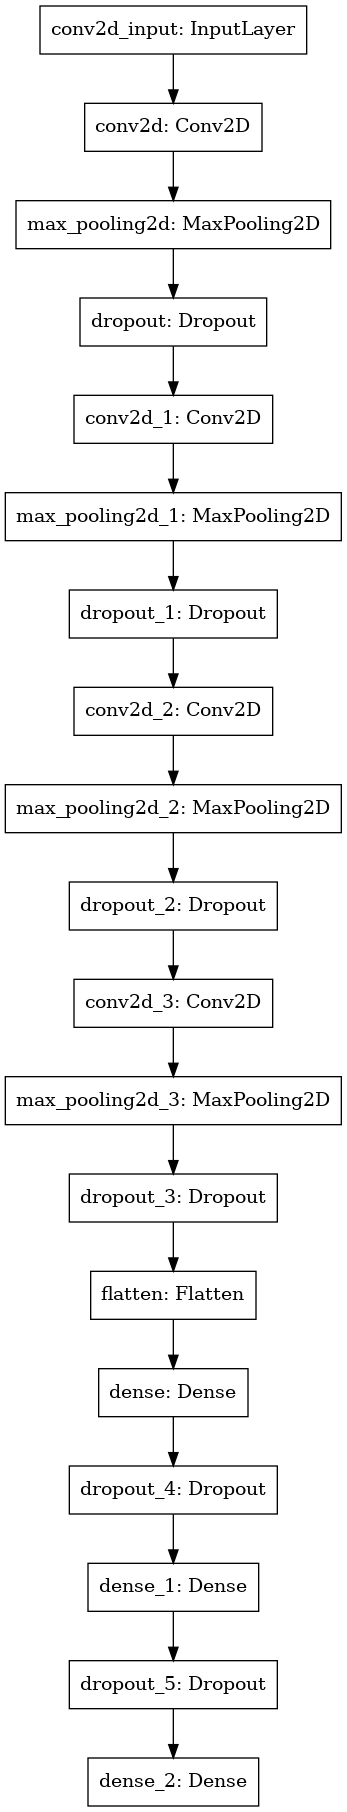

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(cnn_layers_model, to_file='cnn_layers_model.png')

# # Image Classification

In [18]:
deep_cnn_history=cnn_layers_model.fit(x_train,y_train,validation_data=(x_test,y_test), shuffle = True, epochs=100,batch_size=64,verbose=1)

2022-04-11 02:48:02.795387: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 739200000 exceeds 10% of free system memory.
2022-04-11 02:48:03.568061: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 739200000 exceeds 10% of free system memory.
2022-04-11 02:48:04.124936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-11 02:48:05.542033: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


37/37 [==============================] - 11s 92ms/step - loss: 2.1570 - accuracy: 0.1745 - val_loss: 2.2155 - val_accuracy: 0.1120
Epoch 2/100
37/37 [==============================] - 2s 66ms/step - loss: 2.0436 - accuracy: 0.1965 - val_loss: 2.2302 - val_accuracy: 0.1200
Epoch 3/100
37/37 [==============================] - 2s 64ms/step - loss: 2.0461 - accuracy: 0.2000 - val_loss: 2.2541 - val_accuracy: 0.1200
Epoch 4/100
37/37 [==============================] - 2s 64ms/step - loss: 2.0424 - accuracy: 0.1848 - val_loss: 2.3094 - val_accuracy: 0.1360
Epoch 5/100
37/37 [==============================] - 2s 65ms/step - loss: 2.0345 - accuracy: 0.2000 - val_loss: 2.2659 - val_accuracy: 0.1200
Epoch 6/100
37/37 [==============================] - 2s 64ms/step - loss: 2.0279 - accuracy: 0.2048 - val_loss: 2.3056 - val_accuracy: 0.1800
Epoch 7/100
37/37 [==============================] - 2s 65ms/step - loss: 2.0095 - accuracy: 0.2134 - val_loss: 2.2043 - val_accuracy: 0.2000
Epoch 8/100
37/37

In [19]:
deep_cnn_score=cnn_layers_model.evaluate(x_test,y_test,verbose=0)
print('The loss while evaluation of test data with Deep CNN is: {} '.format(deep_cnn_score[0]))
print('The accuracy while evaluation of test data with Deep CNN is: {} '.format(deep_cnn_score[1]))

The loss while evaluation of test data with Deep CNN is: 1.0749731063842773 
The accuracy while evaluation of test data with Deep CNN is: 0.7519999742507935 


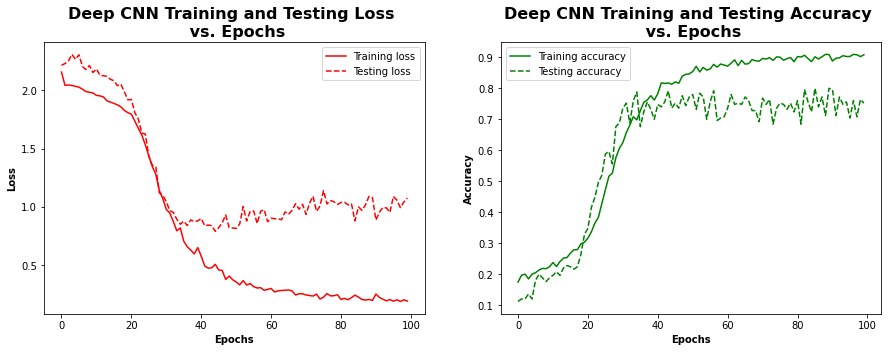

In [20]:
fig, axes= plt.subplots(1,2,figsize=(15,5))
axes[0].plot(deep_cnn_history.history['loss'],label='Training loss',color='red')
axes[0].plot(deep_cnn_history.history['val_loss'],label='Testing loss',color='red',linestyle ='dashed')
axes[1].plot(deep_cnn_history.history['accuracy'],label='Training accuracy',color='green')
axes[1].plot(deep_cnn_history.history['val_accuracy'],label='Testing accuracy',color='green',linestyle ='dashed')
axes[0].set_xlabel('Epochs',fontweight='bold')
axes[0].set_ylabel('Loss',fontweight='bold')
axes[1].set_xlabel('Epochs',fontweight='bold')
axes[1].set_ylabel('Accuracy',fontweight='bold')
axes[0].set_title('Deep CNN Training and Testing Loss \n vs. Epochs',fontsize=16,fontweight='bold')
axes[1].set_title('Deep CNN Training and Testing Accuracy \n vs. Epochs',fontsize=16,fontweight='bold')
axes[0].legend()
axes[1].legend()
plt.show()

In [21]:
from skimage.feature import hog
# train_hog=[]
# test_hog=[]
# for i in x_train:
#     fd, hog_image = hog(i, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True)
#     train_hog.append(fd)
# for i in x_test:
#     fd, hog_image = hog(i, orientations=8, pixels_per_cell=(16, 16),
#                     cells_per_block=(1, 1), visualize=True, multichannel= False)
#     test_hog.append(fd)   
    
# from sklearn import svm
# linear_svc= svm.SVC()
# linear_svc.fit(x_train,y_train)

# from sklearn.metrics import accuracy_score
# predicted = linear_svc.predict(x_test)
# accuracy = accuracy_score(y_test,predicted)
# print(accuracy)

In [22]:
# predictedrr = linear_svc.predict(x_train)
# accuracy = accuracy_score(y_train,predictedrr)

In [23]:
# inception = InceptionV3(weights='imagenet', include_top = True)
# input_tensor = Input(shape=(200,200,1))
# x = Conv2D(3,(3,3),padding='same')(input_tensor)    # x has a dimension of (img_height,img_width,3)
# out1 = inception(x)
# out = Dense(9, activation = 'softmax')(out1)

# model = Model(inputs = input_tensor, outputs = out)
# model.compile(loss=[' Sparse categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

In [24]:
# history= model.fit(x_train,y_train,validation_data=(x_test,y_test), shuffle = True, epochs=50,batch_size=128,verbose=1)

In [25]:
# #function for creating a projected inception module
# def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
#     # 1x1 conv
#     conv1 = Conv2D(f1, (1,1), padding='same', activation='relu',
#                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(layer_in)
#     # 3x3 conv
#     conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu'
#                   ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(layer_in)
#     conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu'
#                   ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(conv3)
#     # 5x5 conv
#     conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu'
#                   ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(layer_in)
#     conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu'
#                   ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(conv5)
#     # 3x3 max pooling
#     pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
#     pool = Conv2D(f4_out, (1,1), padding='same', activation='relu'
#                  ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(pool)
#     # concatenate filters, assumes filters/channels last
#     layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
#     return layer_out
 
# # define model input
# visible = Input(shape=(200,200, 1))

# #add inception layer 1
# layer = inception_module(visible, 16, 24, 32, 8, 16, 16)
# layer= BatchNormalization()(layer)

# # add inception layer 2
# layer = inception_module(layer, 32, 32, 48, 16, 32, 16)

# # Flatten layer
# layer = Flatten()(layer)

# # Dense layers
# layer = Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(layer)
# layer = Dropout(0.4)(layer)
# layer = Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(layer)
# layer = Dropout(0.4)(layer)
# output_layer = Dense(9,activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(layer)

# # create model
# cnn_inception_model = Model([visible], [output_layer])

# # Compile model
# cnn_inception_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
#                             metrics = ['accuracy'])

# # summarize model
# cnn_inception_model.summary()

In [26]:
# cnn_inception_history=cnn_inception_model.fit(x_train,y_train,validation_data=(x_test,y_test), shuffle = True, epochs=10,batch_size=16,verbose=1)

In [27]:
# def feature_extraction(img):
#     feature_extract=[]
#     LL_arr=[]
#     LH_arr=[]
#     HL_arr=[]
#     HH_arr=[]
#     for i in img:
#         titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
#         coeffs2 = pywt.dwt2(i, 'bior1.3')
#         LL, (LH, HL, HH) = coeffs2
#         LL_arr.append(LL)
#         LH_arr.append(LH)
#         HL_arr.append(HL)
#         HH_arr.append(HH)
#         feature_extract.append(coeffs2)
        
#     return HH_arr
# # HL_arr, HH_arr
# train_LL = image_segmentation(train_img_segment)
# #test_LL, test_LH, test_HL, test_HH = image_segmentation(test_img_segment)
# #plot_images(train_feature_extract,"gray")    

In [28]:
# from skimage.feature import graycomatrix, graycoprops
# from skimage.measure import shannon_entropy
# import warnings
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
# def feature_extraction(img_data):
#     #glcm_df = pd.DataFrame(columns=['contrast', 'dissimilarity', 'homogeneity', 'energy','correlation','entropy'] )
#     contrast =[]
#     dissimilarity=[]
#     homogeneity=[]
#     energy=[]
#     correlation=[]
#     entropy=[]
#     glcm_arr=[]
#     for img in img_data:
        
#         bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 224, 240, 255]) #16-bi
#         inds = np.digitize(img, bins)
#         max_value = inds.max()+1
#         glcm = graycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)
#         contrast.append(np.mean(graycoprops(glcm, 'contrast')))
#         dissimilarity.append(np.mean(graycoprops(glcm, 'dissimilarity')))
#         homogeneity.append(np.mean(graycoprops(glcm, 'homogeneity')))
#         energy.append(np.mean(graycoprops(glcm, 'energy')))
#         correlation.append(np.mean(graycoprops(glcm, 'correlation')))
#         entropy.append(shannon_entropy(glcm))
#         glcm_arr.append(glcm)
#     return glcm_arr,contrast, dissimilarity, homogeneity, energy, correlation, entropy

# train_glcm, train_contrast, train_dissimilarity, train_homogeneity, train_energy, train_correlation,train_entropy = feature_extraction(train_img_segment)
# test_glcm, test_contrast, test_dissimilarity, test_homogeneity, test_energy, test_correlation,test_entropy = feature_extraction(test_img_segment)
